# MccV Toxic Domain Lib 2

In [60]:
import pandas as pd
from Bio.Seq import Seq
from IPython.display import Image
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

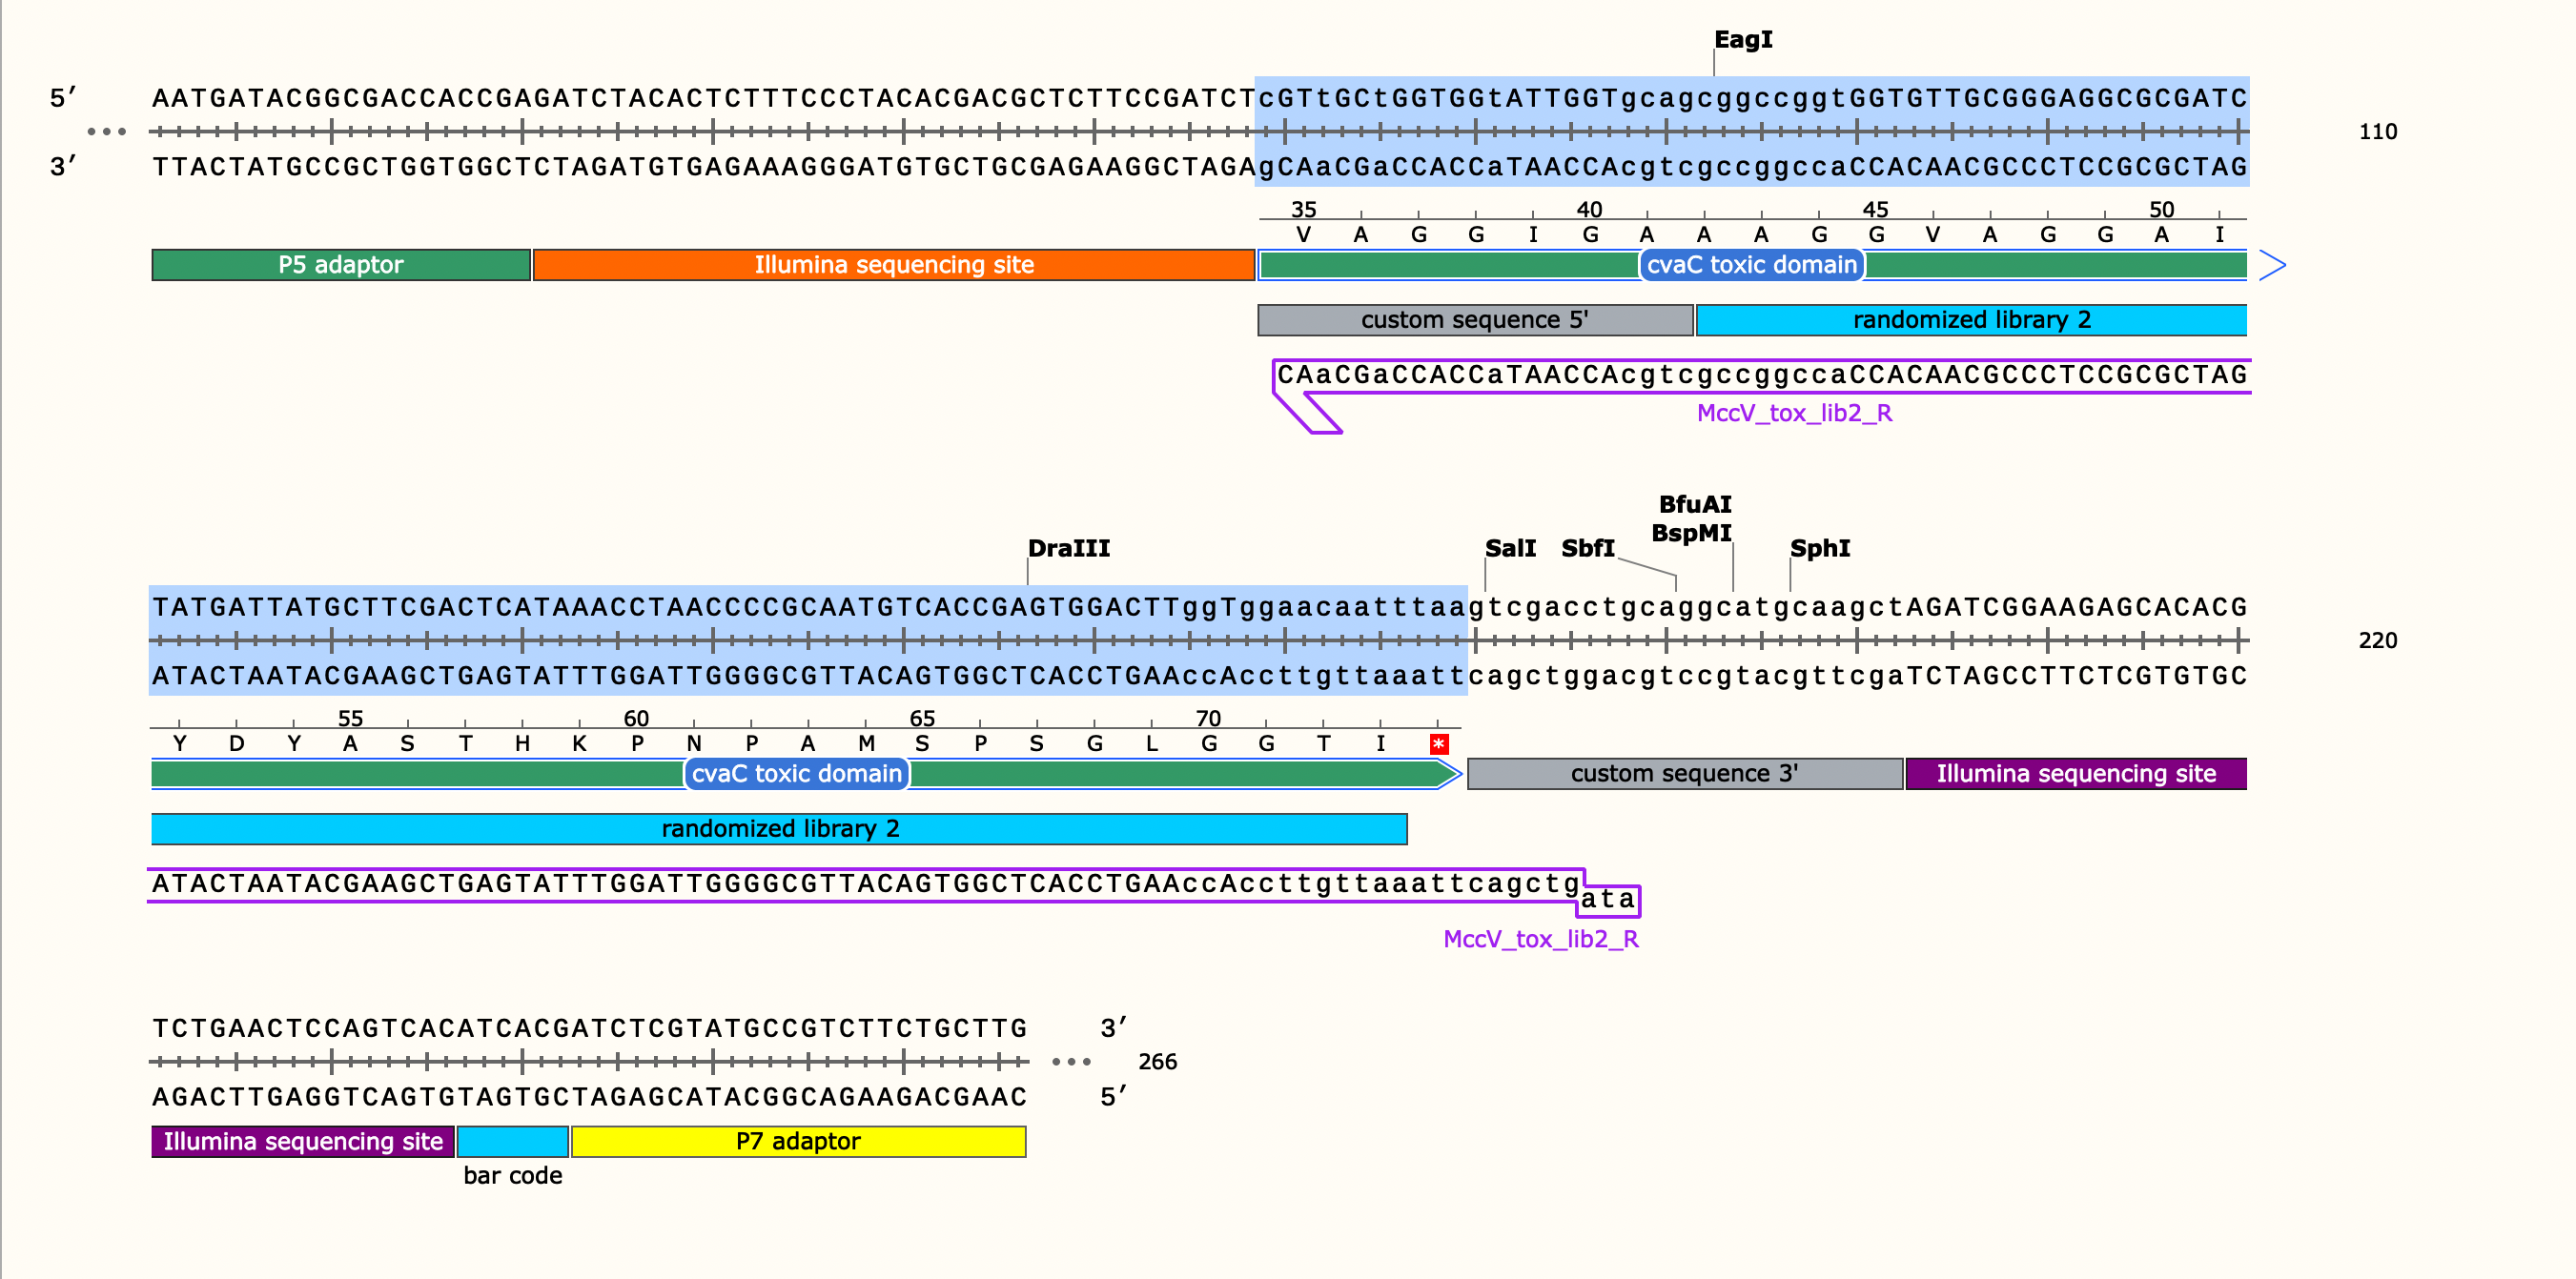

In [13]:
## Amplicon information
Image('cvaC_toxic_library_amplicon.png', width=800)

## Amplicon construct

>custom sequence 5'      
CGTTGCTGGTGGTATTGGTGCAG

>custom sequence 5'   version 2 without the first C - V   
GTTGCTGGTGGTATTGGTGCAG

>randomized library 2    
CGGCCGGTGGTGTTGCGGGAGGCGCGATCTATGATTATGCTTCGACTCATAAACCTAACCCCGCAATGTCACCGAGTGGACTTGGTGGAACAATTTAA

>custom sequence 3'     
GTCGACCTGCAGGCATGCAAGCT 

>reverse complemente of custom sequence 3'     
AGCTTGCATGCCTGCAGGTCGAC

In [26]:
ranLib2 = 'GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCGCGATCTATGATTATGCTTCGACTCATAAACCTAACCCCGCAATGTCACCGAGTGGACTTGGTGGAACAATTTAA'
print(Seq(ranLib2).translate(to_stop=True))
len(ranLib2)/3

VAGGIGAAAGGVAGGAIYDYASTHKPNPAMSPSGLGGTI


40.0

In [ ]:
Seq(ranLib2).translate(to_stop=True)

In [ ]:
%%bash
# "converting fastq to fasta"
seqkit fq2fa --threads 50 "${FASTQ}/${file}.fastq.gz" > "${OUTDIR1}/${file}.fasta"

In [ ]:
%%bash
# "Filtering fastq with the Amplicon region"
seqkit amplicon --threads 50 -m 3 -F CGTTGCTGGTGGTATTGGTGCAG -R AGCTTGCATGCCTGCAGGTCGAC "${OUTDIR1}/${file}.fasta"  > "${OUTDIR2}/${file}_filtered.fasta"

## flexbar documentation
[link](https://github.com/seqan/flexbar/wiki/Options)

In [ ]:
%%bash
# this will trim the custom sequence from the right side of the reads reads
flexbar --reads file_test2.fa --adapters adapterRight.fasta --adapter-trim-end RIGHT --target sample_trimmed.fasta

In [ ]:
%%bash
# "Filtering uniq reads"
# this not work because the reads are not in a single line
#-c – -count : It tells how many times a line was repeated by displaying a number as a prefix with the line.
#-d – -repeated : It only prints the repeated lines and not the lines which aren’t repeated.
time awk "NR" grep -v "^>" "${OUTDIR3}/${file}_trimmed.fasta" | sort | uniq -cd > results/S"$file"_uniq_counts.txt


In [75]:
from Bio import SeqIO
from collections import Counter

# Step 1: Read the FASTA file
input_fasta = "test.fasta"
sequences = [str(record.seq) for record in SeqIO.parse(input_fasta, "fasta")]

# Step 2: Count sequences
sequence_counts = Counter(sequences)

# Step 3: Sort sequences by count (descending order)
# To sort alphabetically, use: sorted_sequences = sorted(sequence_counts.items(), key=lambda x: x[0])
sorted_sequences = sorted(sequence_counts.items(), key=lambda x: x[1], reverse=True)

# Step 4: Output the results
for sequence, count in sorted_sequences:
    print(f"Sequence: {sequence}, Count: {count}")

Sequence: CNTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCGCGATCTATGATTATGCTTCGACTCATAAACCTAGCCCCGCAATGTCACCGAGTGGACTTGGTGGAACAATTTAAGTCGACCTGCAGGCATGCAAGCT, Count: 2
Sequence: CGTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCGCGATCTATGATTATGCTTCGACTCATAAACCTAGCCCCGCAATGTCACCGAGTGGACTTGGTGGAACAATTTAAGTCGACCTGCAGGCATGCAAGCT, Count: 2
Sequence: CNTTGCTGGTGGTATTGGTGCAGCGGCCGCTGGTGTTGCGGGAGGCGCGATCTATGATTATGCTTCGACTCATAAACCTAACCCCGCAATGTCACCGAGTGGACTTGGTGCAACAATTTAAGTCGACCTGCAGGCATGCAAGCT, Count: 1
Sequence: CNTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCGCGATCTATGATTATGCTTCGACTCATAAACCTAACCCCGCAATGTCACCGAGTGGACTTGGTGGAACAATTTAAGTCGACCTGCAGGCATGCAAGCT, Count: 1
Sequence: CNTTGCTGGTGGTATTGGTGCAGCGGGCGGTGGTGTTGCGGGAGGCGCGATCTATGATTATGCTTCGACTCATAAAACTAACCCCGGAATGTCACCGAGTGGACTTGGTGGAAAAATTTAAGTCGACCTGCAGGCATGCAAGCT, Count: 1
Sequence: CNTTGCTGGTGGTATTGGTGCAGCGGCCCGTGGTGTTGCGGGAGGCGCGATCTATGATTATGCTTCGACTCATAAACCTAACCCCGCAATGTCACCGAGCGGACTTGGTGGAACAATTTAAGTCGACCTGCAGGCATGCAAGCT, Count: 1


## Merge the read counts

In [16]:
Glu1= pd.read_csv('results/readCounts/Lib2Glu1_counts.txt', sep="\t").sort_values(by="CountsLib2Glu1", ascending=False)
Glu2= pd.read_csv('results/readCounts/Lib2Glu2_counts.txt', sep="\t").sort_values(by="CountsLib2Glu2", ascending=False)
Glu3= pd.read_csv('results/readCounts/Lib2Glu3_counts.txt', sep="\t").sort_values(by="CountsLib2Glu3", ascending=False)

readCounts = Glu1.merge(Glu2, on="Sequence", how="inner").merge(Glu3, on="Sequence", how="inner")
readCounts['MeanGlu'] = readCounts[['CountsLib2Glu1', 'CountsLib2Glu2', 'CountsLib2Glu3']].mean(axis=1)
readCounts

,Sequence,CountsLib2Glu1,CountsLib2Glu2,CountsLib2Glu3,MeanGlu
0,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,5288836,4456931,5270035,5.005267e+06
1,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,515086,384450,524923,4.748197e+05
2,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,127790,106817,127351,1.206527e+05
3,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,92533,78171,92645,8.778300e+04
4,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,89328,75015,91610,8.531767e+04
...,...,...,...,...,...
654925,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,1,2,1,1.333333e+00
654926,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGTGAGGCG...,1,1,1,1.000000e+00
654927,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGAAGGCG...,1,2,4,2.333333e+00
654928,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGTCG...,1,1,2,1.333333e+00


In [17]:
Ara1= pd.read_csv('results/readCounts/Lib2Ara1_counts.txt', sep="\t").sort_values(by="CountsLib2Ara1", ascending=False)
Ara2= pd.read_csv('results/readCounts/Lib2Ara2_counts.txt', sep="\t").sort_values(by="CountsLib2Ara2", ascending=False)
Ara3= pd.read_csv('results/readCounts/Lib2Ara3_counts.txt', sep="\t").sort_values(by="CountsLib2Ara3", ascending=False)

readCounts = readCounts.merge(Ara1, on="Sequence", how="left").merge(Ara2, on="Sequence", how="left").merge(Ara3, on="Sequence", how="left")
readCounts['MeanAra'] = readCounts[['CountsLib2Ara1', 'CountsLib2Ara2', 'CountsLib2Ara3']].mean(axis=1)
readCounts = readCounts.fillna(0)
readCounts

,Sequence,CountsLib2Glu1,CountsLib2Glu2,CountsLib2Glu3,MeanGlu,CountsLib2Ara1,CountsLib2Ara2,CountsLib2Ara3,MeanAra
0,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,5288836,4456931,5270035,5.005267e+06,2021744.0,1850624.0,1626294.0,1.832887e+06
1,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,515086,384450,524923,4.748197e+05,722684.0,516801.0,523319.0,5.876013e+05
2,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,127790,106817,127351,1.206527e+05,173305.0,154374.0,144831.0,1.575033e+05
3,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,92533,78171,92645,8.778300e+04,41647.0,37259.0,32949.0,3.728500e+04
4,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,89328,75015,91610,8.531767e+04,76553.0,69165.0,63073.0,6.959700e+04
...,...,...,...,...,...,...,...,...,...
654925,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,1,2,1,1.333333e+00,0.0,0.0,0.0,0.000000e+00
654926,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGTGAGGCG...,1,1,1,1.000000e+00,1.0,2.0,1.0,1.333333e+00
654927,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGAAGGCG...,1,2,4,2.333333e+00,2.0,3.0,0.0,2.500000e+00
654928,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGTCG...,1,1,2,1.333333e+00,2.0,0.0,2.0,2.000000e+00


In [23]:
readCounts.query('MeanGlu >200')

,Sequence,CountsLib2Glu1,CountsLib2Glu2,CountsLib2Glu3,MeanGlu,CountsLib2Ara1,CountsLib2Ara2,CountsLib2Ara3,MeanAra
0,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,5288836,4456931,5270035,5.005267e+06,2021744.0,1850624.0,1626294.0,1.832887e+06
1,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,515086,384450,524923,4.748197e+05,722684.0,516801.0,523319.0,5.876013e+05
2,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,127790,106817,127351,1.206527e+05,173305.0,154374.0,144831.0,1.575033e+05
3,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,92533,78171,92645,8.778300e+04,41647.0,37259.0,32949.0,3.728500e+04
4,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,89328,75015,91610,8.531767e+04,76553.0,69165.0,63073.0,6.959700e+04
...,...,...,...,...,...,...,...,...,...
545025,GTTGCTGGTGGTATTGGTGCAGCGGCCGGCGTTGTTGCGGGAGGCG...,1,292,403,2.320000e+02,23.0,5.0,225.0,8.433333e+01
571178,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,1,336,365,2.340000e+02,0.0,1.0,106.0,5.350000e+01
587596,GTTGCTGGTGGTATTGGTGCAGCAGCCGGTGGTGTTGCGGGAGGCG...,1,296,367,2.213333e+02,10.0,3.0,185.0,6.600000e+01
603123,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGTG...,1,366,504,2.903333e+02,86.0,9.0,435.0,1.766667e+02


In [24]:
readCounts['Peptide'] = [''.join(Seq(sq).translate(to_stop=True)) for sq in readCounts['Sequence']]
readCounts['length'] = [len(sq) for sq in readCounts['Peptide']]
readCounts

/stor/home/lcv454/miniconda3/envs/genomics/lib/python3.9/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


,Sequence,CountsLib2Glu1,CountsLib2Glu2,CountsLib2Glu3,MeanGlu,CountsLib2Ara1,CountsLib2Ara2,CountsLib2Ara3,MeanAra,Peptide,length
0,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,5288836,4456931,5270035,5.005267e+06,2021744.0,1850624.0,1626294.0,1.832887e+06,VAGGIGAAAGGVAGGAIYDYASTHKPNPAMSPSGLGGTI,39
1,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,515086,384450,524923,4.748197e+05,722684.0,516801.0,523319.0,5.876013e+05,VAGGIGAAAGGVAGGAIYDY,20
2,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,127790,106817,127351,1.206527e+05,173305.0,154374.0,144831.0,1.575033e+05,VAGGIGAAAGGVAGGAIYDYASTHKPNPAMSP,32
3,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,92533,78171,92645,8.778300e+04,41647.0,37259.0,32949.0,3.728500e+04,VAGGIGAAAGGVAGGAIYDYASTHKPNPAMSPSELGGTI,39
4,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,89328,75015,91610,8.531767e+04,76553.0,69165.0,63073.0,6.959700e+04,VAGGIGAAAGGVAGGAIYNYASTHKPNPAMSPSGLGGTI,39
...,...,...,...,...,...,...,...,...,...,...,...
654925,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,1,2,1,1.333333e+00,0.0,0.0,0.0,0.000000e+00,VAGGIGAAAGGVAGGAIYDYASPHKPNPAISPSGLGGTI,39
654926,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGTGAGGCG...,1,1,1,1.000000e+00,1.0,2.0,1.0,1.333333e+00,VAGGIGAAAGGVA,13
654927,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGAAGGCG...,1,2,4,2.333333e+00,2.0,3.0,0.0,2.500000e+00,VAGGIGAAAGGVAEGAIHDYASTHKPNPAMSPSGLDGTI,39
654928,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGTCG...,1,1,2,1.333333e+00,2.0,0.0,2.0,2.000000e+00,VAGGIGAAAGGVAGVAIYDYASTHKPNPAMSPS,33


48

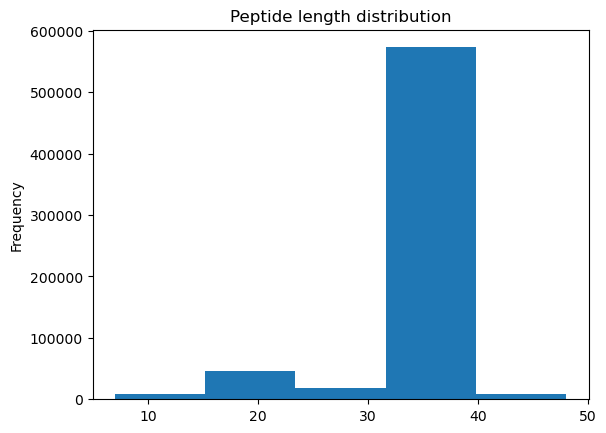

In [25]:
readCounts['length'].plot(kind='hist', bins=5, title='Peptide length distribution')
readCounts['length'].max()

In [26]:
readCounts['Sequence'].unique().shape

(654930,)

In [28]:
readCounts = readCounts.query('MeanGlu >200')
readCounts = readCounts.query('length >=20')
readCounts

,Sequence,CountsLib2Glu1,CountsLib2Glu2,CountsLib2Glu3,MeanGlu,CountsLib2Ara1,CountsLib2Ara2,CountsLib2Ara3,MeanAra,Peptide,length
0,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,5288836,4456931,5270035,5.005267e+06,2021744.0,1850624.0,1626294.0,1.832887e+06,VAGGIGAAAGGVAGGAIYDYASTHKPNPAMSPSGLGGTI,39
1,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,515086,384450,524923,4.748197e+05,722684.0,516801.0,523319.0,5.876013e+05,VAGGIGAAAGGVAGGAIYDY,20
2,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,127790,106817,127351,1.206527e+05,173305.0,154374.0,144831.0,1.575033e+05,VAGGIGAAAGGVAGGAIYDYASTHKPNPAMSP,32
3,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,92533,78171,92645,8.778300e+04,41647.0,37259.0,32949.0,3.728500e+04,VAGGIGAAAGGVAGGAIYDYASTHKPNPAMSPSELGGTI,39
4,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,89328,75015,91610,8.531767e+04,76553.0,69165.0,63073.0,6.959700e+04,VAGGIGAAAGGVAGGAIYNYASTHKPNPAMSPSGLGGTI,39
...,...,...,...,...,...,...,...,...,...,...,...
545025,GTTGCTGGTGGTATTGGTGCAGCGGCCGGCGTTGTTGCGGGAGGCG...,1,292,403,2.320000e+02,23.0,5.0,225.0,8.433333e+01,VAGGIGAAAGVVAGGAIYDYVSTHKPNPAMSPSGLGETI,39
571178,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,1,336,365,2.340000e+02,0.0,1.0,106.0,5.350000e+01,VAGGIGAAAGGVAGGAIYDYVSTHTLNPAIEPSGLGGTI,39
587596,GTTGCTGGTGGTATTGGTGCAGCAGCCGGTGGTGTTGCGGGAGGCG...,1,296,367,2.213333e+02,10.0,3.0,185.0,6.600000e+01,VAGGIGAAAGGVAGGAIYDNVSTHKPKPAMSPGGPGGTI,39
603123,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGTG...,1,366,504,2.903333e+02,86.0,9.0,435.0,1.766667e+02,VAGGIGAAAGGVAGGAIYDYVSTHKPNPAMSPSGLGGTT,39


In [32]:
readCounts.reset_index(inplace=True)
readCounts.rename(columns={'index':'ID'}, inplace=True)
readCounts['ID'] = [f'MccV_{str(x+1)}' for x in readCounts['ID'].values]
readCounts

,ID,Sequence,CountsLib2Glu1,CountsLib2Glu2,CountsLib2Glu3,MeanGlu,CountsLib2Ara1,CountsLib2Ara2,CountsLib2Ara3,MeanAra,Peptide,length
0,MccV_1,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,5288836,4456931,5270035,5.005267e+06,2021744.0,1850624.0,1626294.0,1.832887e+06,VAGGIGAAAGGVAGGAIYDYASTHKPNPAMSPSGLGGTI,39
1,MccV_2,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,515086,384450,524923,4.748197e+05,722684.0,516801.0,523319.0,5.876013e+05,VAGGIGAAAGGVAGGAIYDY,20
2,MccV_3,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,127790,106817,127351,1.206527e+05,173305.0,154374.0,144831.0,1.575033e+05,VAGGIGAAAGGVAGGAIYDYASTHKPNPAMSP,32
3,MccV_4,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,92533,78171,92645,8.778300e+04,41647.0,37259.0,32949.0,3.728500e+04,VAGGIGAAAGGVAGGAIYDYASTHKPNPAMSPSELGGTI,39
4,MccV_5,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,89328,75015,91610,8.531767e+04,76553.0,69165.0,63073.0,6.959700e+04,VAGGIGAAAGGVAGGAIYNYASTHKPNPAMSPSGLGGTI,39
...,...,...,...,...,...,...,...,...,...,...,...,...
58441,MccV_545026,GTTGCTGGTGGTATTGGTGCAGCGGCCGGCGTTGTTGCGGGAGGCG...,1,292,403,2.320000e+02,23.0,5.0,225.0,8.433333e+01,VAGGIGAAAGVVAGGAIYDYVSTHKPNPAMSPSGLGETI,39
58442,MccV_571179,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,1,336,365,2.340000e+02,0.0,1.0,106.0,5.350000e+01,VAGGIGAAAGGVAGGAIYDYVSTHTLNPAIEPSGLGGTI,39
58443,MccV_587597,GTTGCTGGTGGTATTGGTGCAGCAGCCGGTGGTGTTGCGGGAGGCG...,1,296,367,2.213333e+02,10.0,3.0,185.0,6.600000e+01,VAGGIGAAAGGVAGGAIYDNVSTHKPKPAMSPGGPGGTI,39
58444,MccV_603124,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGTG...,1,366,504,2.903333e+02,86.0,9.0,435.0,1.766667e+02,VAGGIGAAAGGVAGGAIYDYVSTHKPNPAMSPSGLGGTT,39


In [34]:
cols=['ID','Sequence','Peptide','length', 'CountsLib2Glu1', 'CountsLib2Glu2', 'CountsLib2Glu3', 'MeanGlu','CountsLib2Ara1', 'CountsLib2Ara2', 'CountsLib2Ara3', 'MeanAra']
readCounts[cols].to_csv('results/read_counts_MccV_full_v02.csv', index=False)

## Results Deseq2

In [44]:
res = pd.read_csv('results/res_full_deseq2.csv', index_col=0)
res = res.query('length==39')
res.head()

,ID,Sequence,Peptide,length,CountsLib2Glu1,CountsLib2Glu2,CountsLib2Glu3,MeanGlu,CountsLib2Ara1,CountsLib2Ara2,CountsLib2Ara3,MeanAra,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,DE
1,MccV_1,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,VAGGIGAAAGGVAGGAIYDYASTHKPNPAMSPSGLGGTI,39,5288836,4456931,5270035,5.005267e+06,2021744,1850624,1626294,1.832887e+06,3.340445e+06,-1.324903,0.030931,-42.834690,0.000000e+00,0.000000e+00,True
4,MccV_4,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,VAGGIGAAAGGVAGGAIYDYASTHKPNPAMSPSELGGTI,39,92533,78171,92645,8.778300e+04,41647,37259,32949,3.728500e+04,6.124604e+04,-1.111678,0.031997,-34.743387,1.744358e-264,5.726493e-262,True
5,MccV_5,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,VAGGIGAAAGGVAGGAIYNYASTHKPNPAMSPSGLGGTI,39,89328,75015,91610,8.531767e+04,76553,69165,63073,6.959700e+04,7.688155e+04,-0.167170,0.031323,-5.337014,9.448978e-08,1.359141e-07,False
6,MccV_6,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,VAGGIGAAAGGVAGGAIYDYPSTHKPNPAMSPSGLGGTI,39,88333,73695,87092,8.304000e+04,78568,70995,63867,7.114333e+04,7.660680e+04,-0.097916,0.031578,-3.100719,1.930517e-03,2.278663e-03,False
7,MccV_7,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,VAGGIGAAAGGVAGGAIYDYASTHKPNPTMSPSGLGGTI,39,87052,76225,91608,8.496167e+04,35419,31408,28515,3.178067e+04,5.706114e+04,-1.294568,0.033410,-38.748408,0.000000e+00,0.000000e+00,True


In [42]:
# def to find the differences between the residues
idx = "VAGGIGAAAGGVAGGAIYDYASTHKPNPAMSPSELGGTI"

def diff_func(idxx):
    MccV = "VAGGIGAAAGGVAGGAIYDYASTHKPNPAMSPSGLGGTI"
    idx = idxx
    diff = []
    for i in range(0, len(MccV)):
        aa = idx[i]
        pg_aa = MccV[i]
        
        if pg_aa == aa:
            diff.append("-")
        else:
            diff.append(aa)
    diff_seq = "".join(diff)
    return diff_seq


diff_func(idx)

'---------------------------------E-----'

In [43]:
# function to add the number of changes in each peptide
def changesFunc(idxx):
    MccV = "VAGGIGAAAGGVAGGAIYDYASTHKPNPAMSPSGLGGTI"
    idx = idxx
    changes = 0
    for i in range(0, len(MccV)):
        aa = idx[i]
        pg_aa = MccV[i]
        
        if pg_aa != aa:
            changes+=1
    return changes

changesFunc(idx)

1

In [45]:
# applying functions
res["diff_in_seq"] = [diff_func(x) for x in res["Peptide"]]
res["changes"] = [changesFunc(x) for x in res["Peptide"]]
res

,ID,Sequence,Peptide,length,CountsLib2Glu1,CountsLib2Glu2,CountsLib2Glu3,MeanGlu,CountsLib2Ara1,CountsLib2Ara2,...,MeanAra,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,DE,diff_in_seq,changes
1,MccV_1,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,VAGGIGAAAGGVAGGAIYDYASTHKPNPAMSPSGLGGTI,39,5288836,4456931,5270035,5.005267e+06,2021744,1850624,...,1.832887e+06,3.340445e+06,-1.324903,0.030931,-42.834690,0.000000e+00,0.000000e+00,True,---------------------------------------,0
4,MccV_4,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,VAGGIGAAAGGVAGGAIYDYASTHKPNPAMSPSELGGTI,39,92533,78171,92645,8.778300e+04,41647,37259,...,3.728500e+04,6.124604e+04,-1.111678,0.031997,-34.743387,1.744358e-264,5.726493e-262,True,---------------------------------E-----,1
5,MccV_5,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,VAGGIGAAAGGVAGGAIYNYASTHKPNPAMSPSGLGGTI,39,89328,75015,91610,8.531767e+04,76553,69165,...,6.959700e+04,7.688155e+04,-0.167170,0.031323,-5.337014,9.448978e-08,1.359141e-07,False,------------------N--------------------,1
6,MccV_6,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,VAGGIGAAAGGVAGGAIYDYPSTHKPNPAMSPSGLGGTI,39,88333,73695,87092,8.304000e+04,78568,70995,...,7.114333e+04,7.660680e+04,-0.097916,0.031578,-3.100719,1.930517e-03,2.278663e-03,False,--------------------P------------------,1
7,MccV_7,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,VAGGIGAAAGGVAGGAIYDYASTHKPNPTMSPSGLGGTI,39,87052,76225,91608,8.496167e+04,35419,31408,...,3.178067e+04,5.706114e+04,-1.294568,0.033410,-38.748408,0.000000e+00,0.000000e+00,True,----------------------------T----------,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58442,MccV_545026,GTTGCTGGTGGTATTGGTGCAGCGGCCGGCGTTGTTGCGGGAGGCG...,VAGGIGAAAGVVAGGAIYDYVSTHKPNPAMSPSGLGETI,39,1,292,403,2.320000e+02,23,5,...,8.433333e+01,1.606202e+02,-1.232739,1.953321,-0.631099,5.279757e-01,5.434893e-01,False,----------V---------V---------------E--,3
58443,MccV_571179,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,VAGGIGAAAGGVAGGAIYDYVSTHTLNPAIEPSGLGGTI,39,1,336,365,2.340000e+02,0,1,...,5.350000e+01,1.355218e+02,-2.476212,2.628524,-0.942054,3.461647e-01,3.614749e-01,False,--------------------V---TL---IE--------,5
58444,MccV_587597,GTTGCTGGTGGTATTGGTGCAGCAGCCGGTGGTGTTGCGGGAGGCG...,VAGGIGAAAGGVAGGAIYDNVSTHKPKPAMSPGGPGGTI,39,1,296,367,2.213333e+02,10,3,...,6.600000e+01,1.458387e+02,-1.513808,2.033769,-0.744336,NaN,NaN,NaN,-------------------NV-----K-----G-P----,5
58445,MccV_603124,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGTG...,VAGGIGAAAGGVAGGAIYDYVSTHKPNPAMSPSGLGGTT,39,1,366,504,2.903333e+02,86,9,...,1.766667e+02,2.401368e+02,-0.508619,1.933460,-0.263062,7.925031e-01,8.016674e-01,False,--------------------V-----------------T,2


In [50]:
cols = ['ID', 'Sequence', 'Peptide', 'length', 'diff_in_seq', 'changes',
        'CountsLib2Glu1', 'CountsLib2Glu2', 'CountsLib2Glu3', 'MeanGlu', 
       'CountsLib2Ara1','CountsLib2Ara2', 'CountsLib2Ara3', 'MeanAra',
        'baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue', 'padj', 'DE',
       ]

res = res[cols]
res.head()

,ID,Sequence,Peptide,length,diff_in_seq,changes,CountsLib2Glu1,CountsLib2Glu2,CountsLib2Glu3,MeanGlu,...,CountsLib2Ara2,CountsLib2Ara3,MeanAra,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,DE
1,MccV_1,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,VAGGIGAAAGGVAGGAIYDYASTHKPNPAMSPSGLGGTI,39,---------------------------------------,0,5288836,4456931,5270035,5.005267e+06,...,1850624,1626294,1.832887e+06,3.340445e+06,-1.324903,0.030931,-42.834690,0.000000e+00,0.000000e+00,True
4,MccV_4,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,VAGGIGAAAGGVAGGAIYDYASTHKPNPAMSPSELGGTI,39,---------------------------------E-----,1,92533,78171,92645,8.778300e+04,...,37259,32949,3.728500e+04,6.124604e+04,-1.111678,0.031997,-34.743387,1.744358e-264,5.726493e-262,True
5,MccV_5,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,VAGGIGAAAGGVAGGAIYNYASTHKPNPAMSPSGLGGTI,39,------------------N--------------------,1,89328,75015,91610,8.531767e+04,...,69165,63073,6.959700e+04,7.688155e+04,-0.167170,0.031323,-5.337014,9.448978e-08,1.359141e-07,False
6,MccV_6,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,VAGGIGAAAGGVAGGAIYDYPSTHKPNPAMSPSGLGGTI,39,--------------------P------------------,1,88333,73695,87092,8.304000e+04,...,70995,63867,7.114333e+04,7.660680e+04,-0.097916,0.031578,-3.100719,1.930517e-03,2.278663e-03,False
7,MccV_7,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,VAGGIGAAAGGVAGGAIYDYASTHKPNPTMSPSGLGGTI,39,----------------------------T----------,1,87052,76225,91608,8.496167e+04,...,31408,28515,3.178067e+04,5.706114e+04,-1.294568,0.033410,-38.748408,0.000000e+00,0.000000e+00,True


In [56]:
most_act = res.query('padj < 0.005 & log2FoldChange < -1')
most_act.head()

,ID,Sequence,Peptide,length,diff_in_seq,changes,CountsLib2Glu1,CountsLib2Glu2,CountsLib2Glu3,MeanGlu,...,CountsLib2Ara2,CountsLib2Ara3,MeanAra,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,DE
1,MccV_1,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,VAGGIGAAAGGVAGGAIYDYASTHKPNPAMSPSGLGGTI,39,---------------------------------------,0,5288836,4456931,5270035,5.005267e+06,...,1850624,1626294,1.832887e+06,3.340445e+06,-1.324903,0.030931,-42.834690,0.000000e+00,0.000000e+00,True
4,MccV_4,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,VAGGIGAAAGGVAGGAIYDYASTHKPNPAMSPSELGGTI,39,---------------------------------E-----,1,92533,78171,92645,8.778300e+04,...,37259,32949,3.728500e+04,6.124604e+04,-1.111678,0.031997,-34.743387,1.744358e-264,5.726493e-262,True
7,MccV_7,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,VAGGIGAAAGGVAGGAIYDYASTHKPNPTMSPSGLGGTI,39,----------------------------T----------,1,87052,76225,91608,8.496167e+04,...,31408,28515,3.178067e+04,5.706114e+04,-1.294568,0.033410,-38.748408,0.000000e+00,0.000000e+00,True
9,MccV_9,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,VAGGIGAAAGGVAGGAIYDYASTHKPNPAMSPSGLGETI,39,------------------------------------E--,1,84111,70067,81882,7.868667e+04,...,31560,27516,3.117367e+04,5.373938e+04,-1.211743,0.033909,-35.734709,1.143189e-279,4.282195e-277,True
10,MccV_10,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGCAGGCG...,VAGGIGAAAGGVAAGAIYDYASTHKPNPAMSPSGLGGTI,39,-------------A-------------------------,1,81698,69420,84760,7.862600e+04,...,32513,29175,3.259133e+04,5.443152e+04,-1.145051,0.031692,-36.130883,7.428274e-286,2.893808e-283,True


In [58]:
# prepare the matrix to plot the heatmap
#most_act["difference_in_seq"] = [diff_func(x) for x in most_act["Sequence"]]
diff = most_act["diff_in_seq"].str.split("", n= -1, expand = True)
most_act = most_act.merge(diff, left_index=True, right_index=True)
most_act

,ID,Sequence,Peptide,length,diff_in_seq,changes,CountsLib2Glu1,CountsLib2Glu2,CountsLib2Glu3,MeanGlu,...,31,32,33,34,35,36,37,38,39,40
1,MccV_1,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,VAGGIGAAAGGVAGGAIYDYASTHKPNPAMSPSGLGGTI,39,---------------------------------------,0,5288836,4456931,5270035,5.005267e+06,...,-,-,-,-,-,-,-,-,-,
4,MccV_4,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,VAGGIGAAAGGVAGGAIYDYASTHKPNPAMSPSELGGTI,39,---------------------------------E-----,1,92533,78171,92645,8.778300e+04,...,-,-,-,E,-,-,-,-,-,
7,MccV_7,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,VAGGIGAAAGGVAGGAIYDYASTHKPNPTMSPSGLGGTI,39,----------------------------T----------,1,87052,76225,91608,8.496167e+04,...,-,-,-,-,-,-,-,-,-,
9,MccV_9,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,VAGGIGAAAGGVAGGAIYDYASTHKPNPAMSPSGLGETI,39,------------------------------------E--,1,84111,70067,81882,7.868667e+04,...,-,-,-,-,-,-,E,-,-,
10,MccV_10,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGCAGGCG...,VAGGIGAAAGGVAAGAIYDYASTHKPNPAMSPSGLGGTI,39,-------------A-------------------------,1,81698,69420,84760,7.862600e+04,...,-,-,-,-,-,-,-,-,-,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58397,MccV_75203,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,VAGGIGAAAGGVAGGAIYDYVSYHKPNPAMSPSGLGGTI,39,--------------------V-Y----------------,2,66,254,365,2.283333e+02,...,-,-,-,-,-,-,-,-,-,
58403,MccV_86650,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGCG...,VAGGIGAAAGGVAGGASYDYVSTHKPNPEMSPSGLGGSI,39,----------------S---V-------E--------S-,4,35,398,618,3.503333e+02,...,-,-,-,-,-,-,-,S,-,
58418,MccV_181453,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTAGCGGGAGGCG...,VAGGIGAAAGGVAGGAIYDYVSTHKPNPAMSPSGLGRTI,39,--------------------V---------------R--,2,4,731,921,5.520000e+02,...,-,-,-,-,-,-,R,-,-,
58426,MccV_250353,GTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGAGGGAGGCG...,VAGGIGAAAGGVEGGAIYDYVSTHKPNPAMSPSGLGGTI,39,------------E-------V------------------,2,3,306,436,2.483333e+02,...,-,-,-,-,-,-,-,-,-,


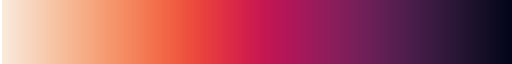

In [88]:
import matplotlib.colors as mcolors

# create a colormap that starts with white and transitions to the colors in the "rocket" colormap
cmap = mcolors.LinearSegmentedColormap.from_list("custom", ["white"] + sns.color_palette("rocket_r", n_colors=256).as_hex())
cmap

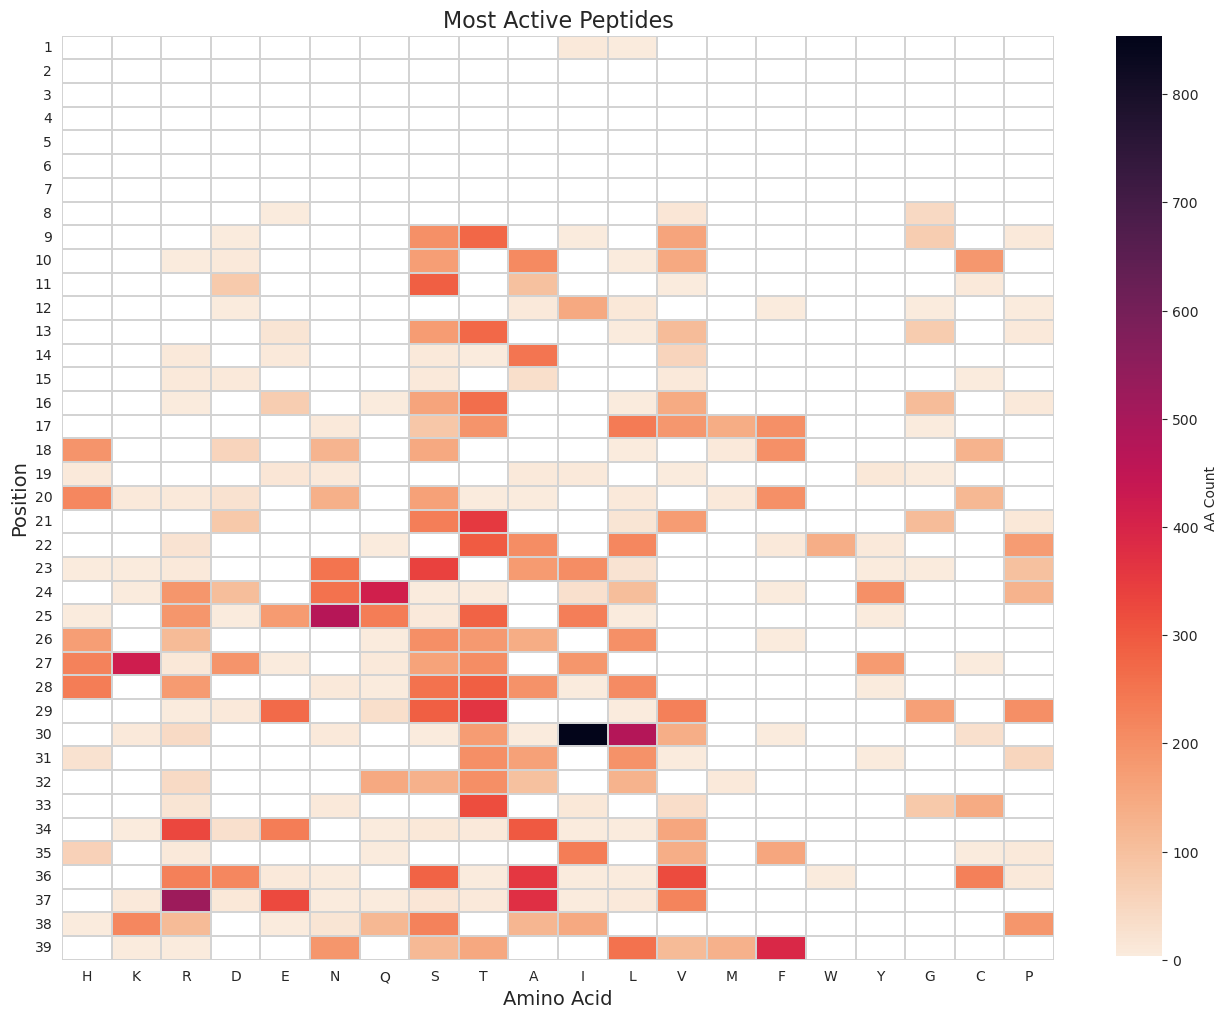

In [115]:
# charged->polar->aliphatic->aromatic->other
aa_list = ['H', 'K', 'R', 'D', 'E', 'N', 'Q', 'S', 'T', 'A', 'I', 'L', 'V', 'M', 'F', 'W', 'Y','G', 'C', 'P']

mtx = pd.DataFrame(0, index=aa_list, columns=np.arange(1, 40))

# fill the matix with the count of each amino acid in each position
for i in range(1, 40):
    pos_count = most_act[i].value_counts().to_dict()

    for k,v in pos_count.items():
        if k != '-':
            mtx.loc[k,i] = v

# plot the heatmap

plt.figure(figsize=(16, 12))
plt.title("Most Active Peptides", size=16)
sns.heatmap(mtx.T, cmap=cmap, cbar_kws={'label': 'AA Count'}, linewidths=0.003, linecolor='#D3D3D3')
plt.xlabel("Amino Acid", size=14)
plt.ylabel("Position", size=14)
plt.yticks(rotation=0)
plt.savefig('results/heatmap_most_active_lfg-1.png', dpi=600)
plt.show()

In [116]:
#res.to_excel('results/res_full_deseq2_annot.xlsx', index=False)

## Clustering reads

[link](http://www.bioinformatics.org/cd-hit/cd-hit-user-guide.pdf)   
Explanation of Key Parameters:    
-c 0.99: Sequence identity threshold is set to 99%, which means sequences must be at least 99% similar to be clustered together.    
-uL 0.01, -uS 0.01: Allows up to 1% of the sequence to be unmatched, accommodating the 1% dissimilarity that 99% similarity implies.    
-aL 1.0, -aS 1.0: Ensures that the alignments cover 100% of the length of both the longer and shorter sequences, respectively.    
-s 1.0, -S 0: Ensures that no length variation is permitted between the sequences within a cluster.    
-n 5: Uses a word length of 5, which is suitable for high-similarity clustering.     
-T 4, -M 2000: Uses 4 threads for processing and limits memory usage to 2000 MB.     


In [ ]:
cd-hit -i "${INPUT}/${file}_trimmed.fasta" -o "${OUTDIR2}/${file}_clustered" -c 0.99 -n 5 -G 0 -M 0 -T 50 -sc 1 -aL 1.0 -aS 1.0 -s 1.0 -S 0 -uL 0.0 -uS 0.0 -U 0

In [7]:
df = pd.read_csv('results/Lib2Glu1_R1_001_uniq_counts.txt', sep="\s+", header=None, names=["Counts", "Sequence"]).sort_values(by="Counts", ascending=False)
df.query('Counts > 100')

,Counts,Sequence
536272,5283596,CGTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGC...
493330,514600,CGTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGC...
532725,127664,CGTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGC...
534119,92458,CGTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGC...
461637,89229,CGTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGC...
...,...,...
345689,101,CGTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGAGAGGC...
546994,101,CGTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGC...
681421,101,CGTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGTGGGAGGC...
616336,101,CGTTGCTGGTGGTATTGGTGCAGCGGCCGGTGGTGTTGCGGGAGGC...
